In [9]:
from IPython.display import display
import pandas as pd
import subprocess
import math

# INIT
G = 0b1101
M = 0b0010
RANGE = 16
K = 4
R = math.floor(math.log2(G)) 
N = K + R

EXE_PATH = './cmake-build-debug/cyclic_mode.exe'
options = ['-c', '-d', '-a']

# Start
data = []


def get_row(path, g, m, option):
    row = {}
    executable_path = f'{path} {option} {g} {m}'
    process = subprocess.Popen(executable_path, stdout=subprocess.PIPE)
    output = process.communicate()[0].decode('utf-8').split(', ')
    if option == '-c':
        row['g'] = bin(int(output[0])).replace('0b', '').zfill(K)
        row['m'] = bin(int(output[1])).replace('0b', '').zfill(K)
        row['a'] = bin(int(output[2])).replace('0b', '').zfill(N)
    elif option == '-d':
        row['m^'] = bin(int(output[0])).replace('0b', '').zfill(K)
        row['E'] = bin(int(output[1])).replace('0b', '')
    else:
        row['m1^'] = bin(int(output[0])).replace('0b', '').zfill(K)
        row['E1'] = bin(int(output[1])).replace('0b', '')
    return row


In [10]:
for e in range(0, RANGE):
    row = get_row(EXE_PATH, G, M, '-c')
    b = int(row['a'], 2) ^ e
    row['e'] = bin(e).replace('0b', '').zfill(N)
    row['b'] = bin(b).replace('0b', '').zfill(N)
    row1 = get_row(EXE_PATH, G, b, '-d')
    row2 = get_row(EXE_PATH, G, b, '-a')
    row.update(row1)
    row.update(row2)
    data.append(row)


df = pd.DataFrame(data)
display(df)


,g,m,a,e,b,m^,E,m1^,E1
0,1101,0010,0010111,0000000,0010111,0010,0,0010,0
1,1101,0010,0010111,0000001,0010110,0010,1,0010,1
2,1101,0010,0010111,0000010,0010101,0010,1,0010,1
3,1101,0010,0010111,0000011,0010100,0010,1,0010,1
4,1101,0010,0010111,0000100,0010011,0010,1,0010,1
5,1101,0010,0010111,0000101,0010010,0010,1,0010,1
6,1101,0010,0010111,0000110,0010001,0010,1,0010,1
7,1101,0010,0010111,0000111,0010000,0010,1,0010,1
8,1101,0010,0010111,0001000,0011111,0011,1,0011,1
9,1101,0010,0010111,0001001,0011110,0011,1,0011,1


0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b10
0b0
0b0
0b0
0b0
0b10000
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b10000000
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b10
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b1000
0b0
0b0
0b1
0b0
0b0
0b0
0b0
0b0
0b0
0b10000
0b100000
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b100000
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b1000
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b10100
0b0
0b0
0b0
0b0
0b0
0b10
0b10000
0b0
0b0
0b1000000
0b0
0b1000000
0b0
0b10
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b0
0b1000
0b0
0b0
0b0
0b0
0b0
0b1000000
0b0
0b0
0b0
0b0
0b0
0b0
0b10000
0b100
0b0
0b100
0b0
0b0
0b0
0b0
0b0
0b0
0b100
0b0
0b0
0b0
0b1000
0b0
0b0
0b0
0b0
0b0
0b0
0b1000
0b0


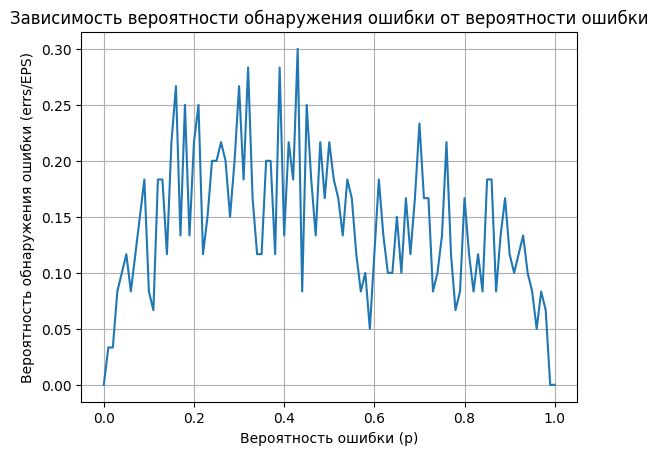

In [89]:
import math
import subprocess
import numpy as np

# Вероятность ошибки
# Парметр точности (число экспирементов)
EPS = 60
# Вероятность ошибки в канале
DELTA_ERR = 0.01
# Длина кодируемой последовательности
L = 5
# Порождающий многочлен
G = 0b1011

mod_results = []
p_values = []
error_probabilities = []

for p in np.arange(0, 1.000001, DELTA_ERR):
    errs = 0
    m = np.random.randint(0, 2**(L+1)-1) 
    # print (f'M: {bin(m)}')
    for i in range(EPS):
        # Создание случайного сообщения длиной L

        # Генерация вектора ошибки
        e = 0
        e_deg = 0
        while (L + 3) > e_deg:
            rand = np.random.random()
            if rand <= p:
                e += 2**e_deg
            e_deg += 1

        if p < 0.2:
            print(bin(e))
        row_coder = get_row(EXE_PATH, G, m, '-c')
        # print('A:',  {bin(int(row_coder['a'], 2))})
        
        b = int(row_coder['a'], 2) ^ e
        row_decoder = get_row(EXE_PATH, G, b, '-d')

        # print(m, int(row_coder['m'], 2), int(row_decoder['m^'], 2))
        
        if ((m != int(row_decoder['m^'], 2)) and (int(row_decoder['E'], 2) == 0)) or ((m == int(row_decoder['m^'], 2)) and (int(row_decoder['E'], 2) != 0)):
            errs += 1

    p_values.append(p)
    error_probabilities.append(errs / EPS)

    # print(f'P: {round(p, 1)}; \tpe: {errs / EPS}')

plt.plot(p_values, error_probabilities)
plt.xlabel('Вероятность ошибки (p)')
plt.ylabel('Вероятность обнаружения ошибки (errs/EPS)')
plt.title('Зависимость вероятности обнаружения ошибки от вероятности ошибки')
plt.grid(True)
plt.show()

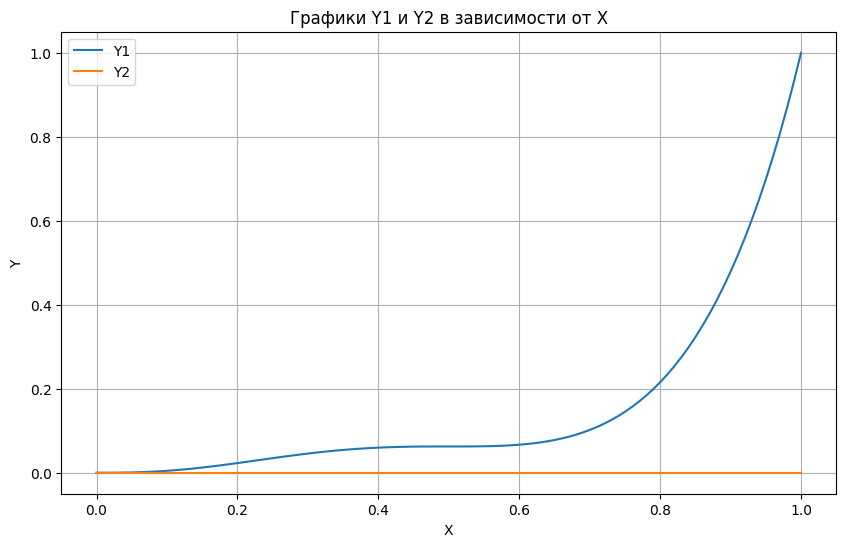

In [75]:
import matplotlib.pyplot as plt

# Загрузка данных из файла
file_path = "file.txt"  # Замените "your_file_path.txt" на путь к вашему файлу
data = {"X": [], "Y1": [], "Y2": []}

with open(file_path, 'r') as file:
    for line in file:
        if line.strip():  # Пропускаем пустые строки
            parts = line.split("=")
            data["X"].append(float(parts[0]))
            y_values = [float(value) if value != "nan" else 0.0 for value in parts[1].split("=")]
            if len(y_values) == 2:
                data["Y1"].append(y_values[0])
                data["Y2"].append(y_values[1])
            else:
                data["Y1"].append(y_values[0])
                data["Y2"].append(0.0)

# Построение графика
plt.figure(figsize=(10, 6))

plt.plot(data["X"], data["Y1"], label="Y1")
plt.plot(data["X"], data["Y2"], label="Y2")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Графики Y1 и Y2 в зависимости от X")
plt.legend()

plt.grid(True)
plt.show()
